In [2]:
import numpy as np
import jax

from santa import base, core
from santa.constraints import intersection

Insertion 1) 0.35, 0.8, np.pi

Insertion 2) 0.4125, 0.5, np.pi

Insertion 3) 0.45, 0.25, np.pi

Insertion 4) 0.425, 0.0, np.pi

Insertion 5)

In [143]:
dtype = jax.numpy.float16
params = (
    jax.numpy.zeros((1, 2), dtype=dtype),
    jax.numpy.zeros((1,), dtype=dtype) + 0.0 * jax.numpy.pi,
)

dx = 0.2208889
dy = 0.8 + 0.2
da = np.pi
params_other = (
    params[0] + jax.numpy.array([[
        dx * jax.numpy.cos(params[1][0]) - dx * jax.numpy.sin(params[1][0]),
        dy * jax.numpy.cos(params[1][0]) + dy * jax.numpy.sin(params[1][0]),
    ]], dtype=dtype),
    params[1] + jax.numpy.zeros((1,), dtype=dtype) + da
)
print(params[0].shape, params_other[0].shape)

(1, 2) (1, 2)


(Array([[4.2588363e-05],
        [4.2588363e-05]], dtype=float32),
 False)

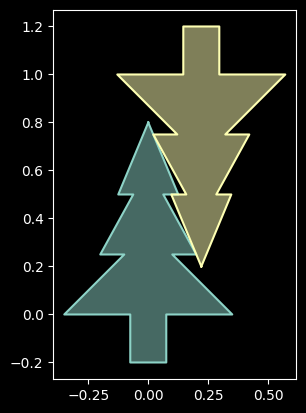

In [144]:
params_all = jax.tree.map(lambda a, b: jax.numpy.concatenate([a, b], 0), params, params_other)
trees = base.params_to_trees(params_all)

base.plot(trees)

(
    intersection.get_intersection_score_matrix_f(params_all),
    base.check_intersection(trees[0], trees[1:])
)

(Decimal('0.2209000000000000130118138486068346537649631500244140625'), Decimal('1'), Decimal('180'))


False

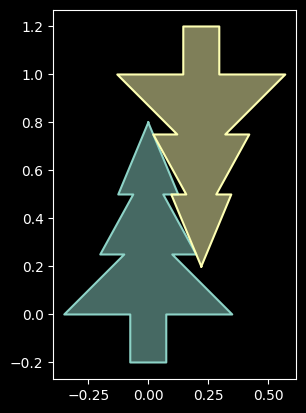

In [134]:
trees = [
    base.ChristmasTree(0, 0, 0),
    base.ChristmasTree(dx, dy, da * 180 / np.pi),
]

base.plot(trees)
print(trees[1].get_params())
base.check_intersection(trees[0], trees[1:])

